# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v4i6l4-net_in_TPE

1. 4個變數：隔夜拆款利率、臺北許可建照數、臺北總戶數、臺北房價指數

2. Lag = 4

* 對於臺北總共有三種model，這是第3種

    1. 利率、許可建照數、臺北人口總數、臺北房價指數

    2. 利率、許可建照數、戶數、臺北房價指數

    3. 利率、許可建照數、淨遷入數、臺北房價指數

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{NetInMigrant}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &a_{24}\\
0 &0 &a_{33} &a_{34}\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
getwd()

[1] "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/2021-01-29/v4i6l4-net_in_TPE"

In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

In [3]:
# 設定路徑
#Path = "/home/ubuntu/Thesis/6_VAR_model/R"
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
#inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



### 讀資料

In [4]:
###### 讀取資料 ######
file = "data/df_pop.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 4-variable model
By <- data %>% select(interest_rate, permit, net_in_migrant, hp) %>% as.matrix

In [5]:
dim(By)

[1] 91  4

### 模型設定

In [6]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [7]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

1.347651,-0.0003348613,-0.000003523394,0.009253238,-0.3922806,0.000232237,0.000003229761,-0.009453905,0.04906817
20.117234,0.5507427747,-0.001037507593,0.112372677,-21.5258503,0.180600488,0.000797501195,-0.243559397,53.38920347
921.532668,29.0170198150,0.425138577676,-66.869843613,-1499.5395360,-8.159079369,0.271110027035,63.831941439,-1385.21588398
-3.238399,-0.0268433444,0.000321084195,0.981015992,1.1637831,0.056717663,-0.000160224683,-0.002469399,6.53930911


0.04299995,0.1469812,49.61297,0.1875599
0.14698121,370.2540784,4610.47844,-4.3042896
49.61297454,4610.4784421,12999896.63334,1624.8441244
0.18755988,-4.3042896,1624.84412,28.8889131


0.03865164,0.1321179,44.59593,0.1685931
0.13211794,332.8126548,4144.25029,-3.8690243
44.59593217,4144.2502850,11685300.34458,1460.5340444
0.16859315,-3.8690243,1460.53404,25.9675624


### AIC/SIC

In [8]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 22.03813

AIC,23.20959,22.84712,22.76938,22.28707
SIC,23.76510,23.85376,24.23326,24.21444
HQ,23.43360,23.25287,23.35914,23.06316


AIC SIC  HQ 
  4   1   4

### 選擇lag期數

In [9]:
# 依據AIC選擇
VAR.P = 4

# SVAR

## Identification

關於戶數、遷入、遷出，沒有那麼外生

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{NetInMigrant}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0\\
a_{21} &a_{22} &0 &a_{24}\\
0 &0 &a_{33} &a_{34}\\
a_{41} &a_{42} &a_{43} &a_{44}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

In [10]:
### 4-variable model

Amat = diag(4)
# Identification Conditions

Amat[2,1]  = NA; Amat[2,4]  = NA;

Amat[3,4]  = NA;

Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;

Bmat = diag(4)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0
NA,1,0,NA
0,0,1,NA
NA,NA,NA,1


NA,0,0,0
0,NA,0,0
0,0,NA,0
0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
seed_counter <- 0
i <- 0
while(TRUE){
    i <- i+1
    set.seed(i)
    SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
    
    if(class(SVAR_AB_est)=="try-error"){
        next
    }else{
        A0.Std <- SVAR_AB_est$A0.Std
        B0.Std <- SVAR_AB_est$B0.Std
    }
        
    if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
        seed_stored <- rbind(seed_stored, i)
        cat("Seed: ", i, " found\n")
        write.csv(seed_stored, "seed_v4i1l2-norm.csv")
        
        # 把Variance Decomp的table畫出來
        SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
        SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 4, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
          if(sum((SVAR_AB_VarDecomp*100)>90)>0){ #如果變異數分解的情況夠好就印出來
              next
          }else{
              cat("Now in seed: ", file = "output_v4i1l2.txt",append = T);
              cat(i, file = "output_v4i1l2.txt", append = T)
              cat("\n\n", file = "output_v4i1l2.txt", append = T)
              cat(SVAR_AB_VarDecomp*100, file = "output_v4i1l2.txt", append = T)
              cat("\n\n", file = "output_v4i1l2.txt", append = T)
              seed_counter <- seed_counter +1
  }
    }
    if(seed_counter>=1000){
        break
  }
#   cat("Now in teration: ", i, "\n",
#       "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

# 找到的seed

從 normal(0,1) 抽出的好的seed:

832221

In [11]:
set.seed(83221)
rnorm(10)

[1]  2.51543496  1.19949382  2.47246506 -0.56056281 -0.44847894  0.60030735
 [7]  0.65072046 -0.62414223  0.07163308  0.38144961

In [12]:
set.seed(83221)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [13]:
A0; B0
A0.Std; B0.Std

1.000000,0.00000,0.0000,0.0000000
-10.900669,1.00000,0.0000,0.4836693
0.000000,0.00000,1.0000,692.1696871
2.452182,36.48474,19.3199,1.0000000


0.175727,0.00000,0.000,0.00
0.000000,16.88703,0.000,0.00
0.000000,0.00000,3246.927,0.00
0.000000,0.00000,0.000,64433.39


0.00000,0.000,0.000000,0.000000
11.58673,0.000,0.000000,1.411436
0.00000,0.000,0.000000,76.668562
NaN,1568.019,2.307713,0.000000


0.01331672,0.000000,0.000,0.000
0.00000000,1.280987,0.000,0.000
0.00000000,0.000000,206.251,0.000
0.00000000,0.000000,0.000,5959.668


## IRF (without Bootstrap C.I.)

In [14]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 16) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:4){
    for(i in 1:4){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [15]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))

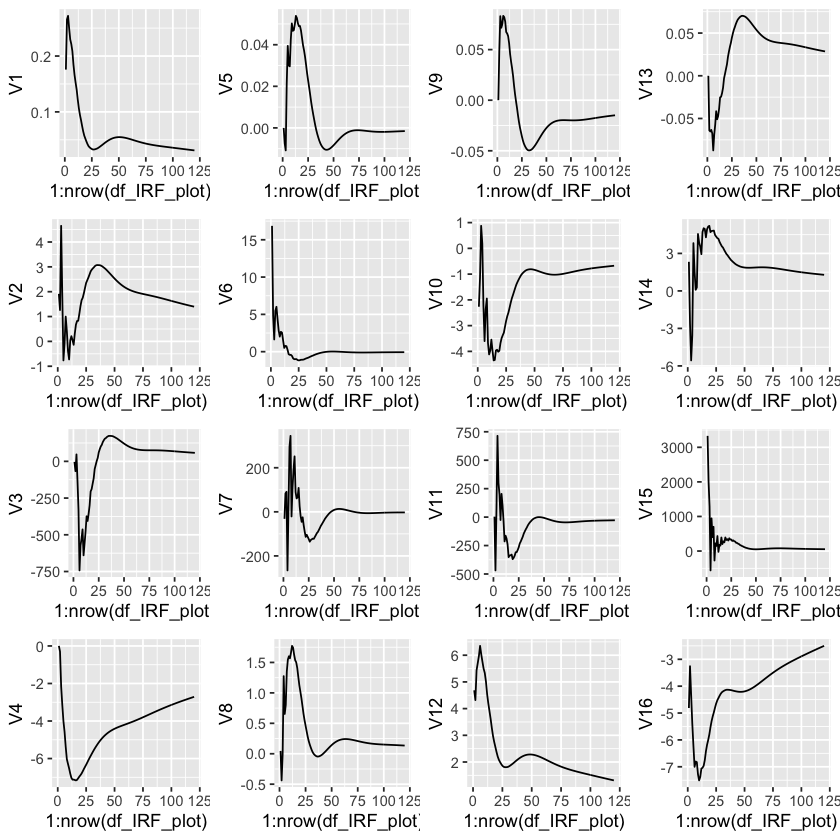

In [16]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [17]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
      ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
#     print(Y.sim[length(Y.sim)])
#     print(U.sim[length(U.sim)])
#     print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
#   cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
#     cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
#     cat("This iteration turns out a proper result. \n
#         Estimate its IRF and save.\n")
  }else{
    next
  }
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 87 16

[1]  4 16

[1] 87  4

In [18]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v4i6-net_in_TPE.rds")
#```

In [19]:
df_IRF.sim <- read_rds("df_IRF.sim_v4i6-net_in_TPE.rds")

In [20]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.1757270,1.9130015,-3.635191,0.005251878,-0.0000000000000003439858,16.864778,-31.85074,0.046015791,-0.000000000000001647024,-2.2660433,4.036816,4.685109,0.00000000000001746363,2.32756458,3330.93252,-4.812306
0.3022709,2.2040961,116.024002,-0.816135089,0.0013469207526192049536,2.057511,599.06905,0.003656206,0.056824402676640184406,0.4689420,-739.002406,3.155921,-0.04097616517901459671,-1.15713289,2474.09814,-1.390204
0.3172251,4.8278033,143.793316,-3.098480834,0.0063982015781139760235,1.237874,330.14406,1.408294831,0.069248898008943252091,3.4608141,-37.900106,4.329504,-0.01757327583203086019,-9.89437292,1760.16511,-2.227699
0.2813243,3.3730556,478.633998,-4.380012840,0.0349836506773895106193,3.147224,-152.14967,1.764997620,0.056476643845142893152,1.3560562,579.623599,4.819223,-0.01619167564353182071,-4.31628542,-407.33932,-4.248441
0.2542460,-0.2794261,331.768606,-5.339476376,0.0425979398289857633109,4.293305,270.52361,0.990366620,0.071924944498475737453,-0.1159841,236.091563,5.288453,-0.04978262867823479015,0.50679656,734.09413,-4.982030
0.2404456,-1.1609225,-116.031949,-6.334363469,0.0304084072469620256274,2.920161,585.09384,1.727321279,0.077584926920915966986,-2.0876596,420.846090,6.058457,-0.05391983279511228244,0.00837435,64.59898,-6.885435


### 畫IRF & Bootstrap C.I.

In [21]:
df_IRF_plot.BS.L <- matrix(NA, 120, 16)
df_IRF_plot.BS.U <- matrix(NA, 120, 16)
df_IRF_plot.BS.Median <- matrix(NA, 120, 16)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 16)
for(col in 1:16){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [22]:
ind <- 0
for(i in 1:4){
  for(j in 1:4){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [23]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Net In Migrant to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Net In Migrant to Housing Supply Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock3
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Net In Migrant to Housing Demand Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock4
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Net In Migrant to Housing Speculation Shock')+Text_Size_Theme
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

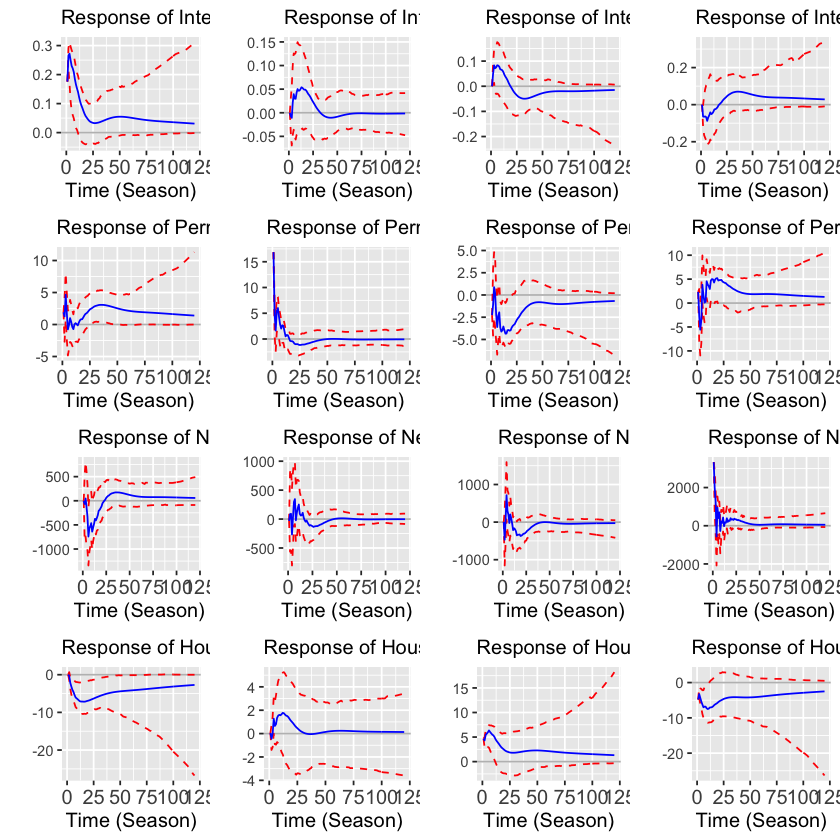

In [24]:
multiplot(p1,p2,p3,p4,
          p5,p6,p7,p8,
          p9,p10,p11,p12,
          p13,p14,p15,p16,
          cols = 4)

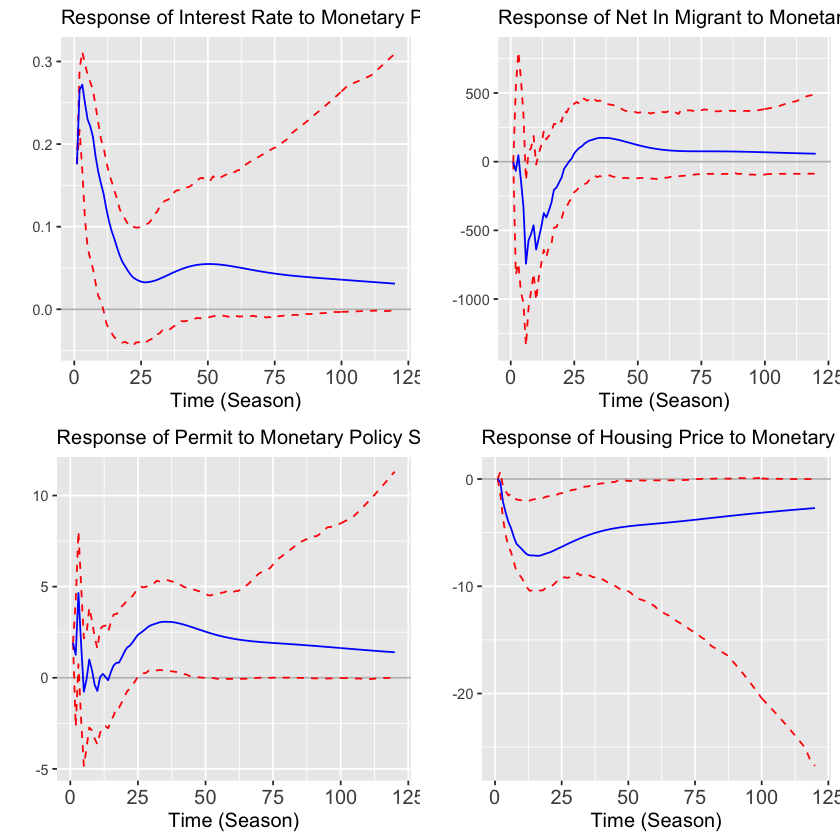

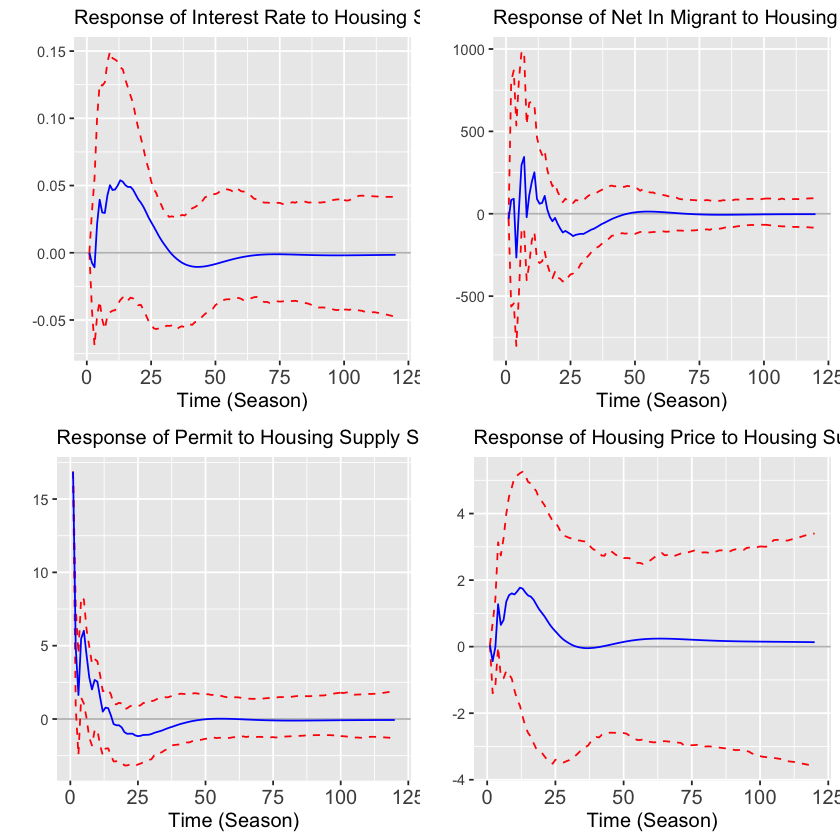

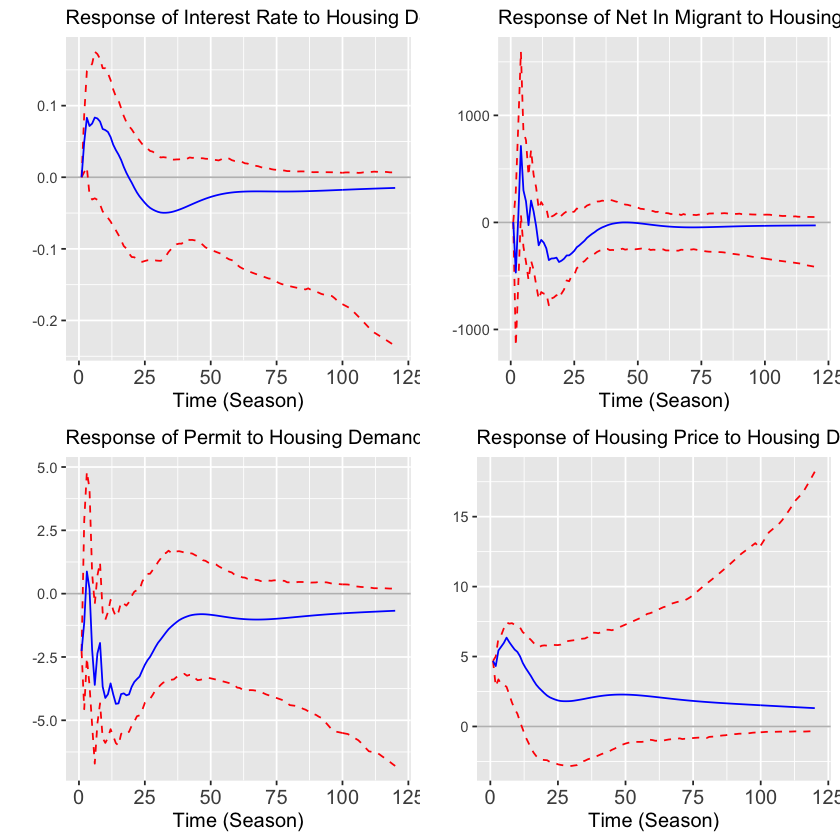

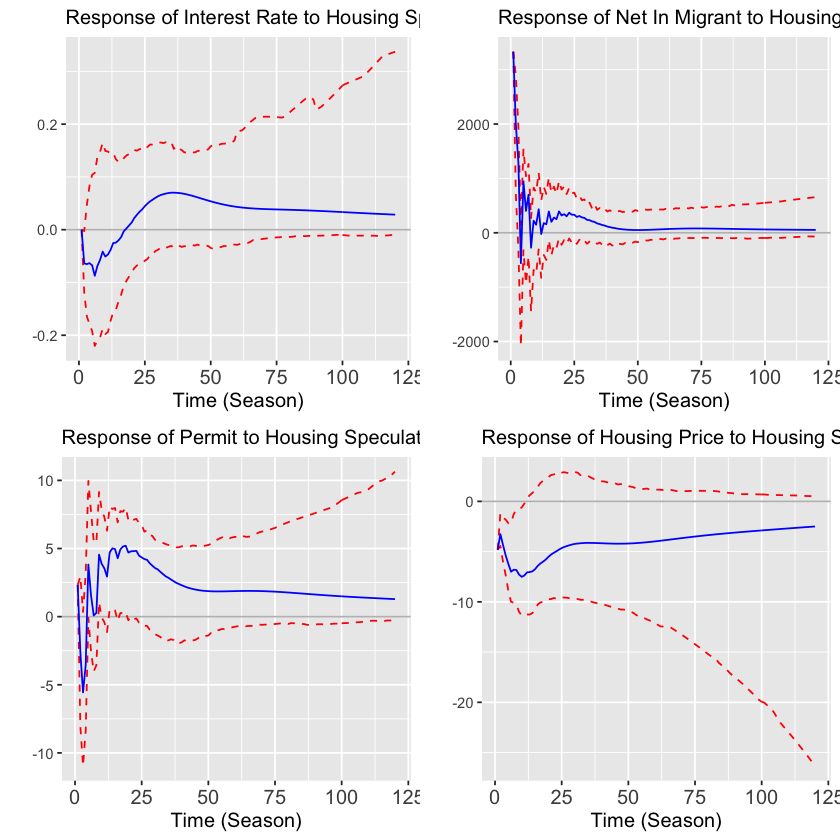

In [25]:
# For shock 1
multiplot(p1,p2,p3,p4,
          cols = 2)
# For shock 2
multiplot(p5,p6,p7,p8,
          cols = 2)
# For shock 3
multiplot(p9,p10,p11,p12,
          cols = 2)
# For shock 4
multiplot(p13,p14,p15,p16,
          cols = 2)

In [26]:
# save plot
# shock 1
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 1
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_IRF_shock2.png", 
       plot = multiplot(p5,p6,p7,p8, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_IRF_shock3.png", 
       plot = multiplot(p9,p10,p11,p12, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_IRF_shock4.png", 
       plot = multiplot(p13,p14,p15,p16, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [27]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 4, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
SVAR_AB_VarDecomp*100

h=1,0.00006114344,0.004693906,48.65865,51.33660
h=2,0.12012937333,0.259568360,54.38656,45.23374
h=3,3.72302212105,0.151947480,54.93666,41.18837
h=4,7.28153625780,0.905894201,51.12462,40.68795
h=5,10.50189125711,0.770155284,47.43182,41.29613
h=6,12.80644281040,0.717435492,44.37924,42.09688
h=7,15.58007297988,0.915376056,41.68074,41.82381
h=8,18.39736958692,1.120783583,39.12250,41.35934
h=9,20.55859308967,1.273657586,36.65255,41.51520
h=10,22.34180086977,1.364031354,34.50171,41.79246
h=11,24.06503342013,1.462382794,32.61176,41.86082


In [28]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hs = V2,
           hd = V3,
           sp = V4) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.00,48.66,51.34
2,0.12,0.26,54.39,45.23
4,7.28,0.91,51.12,40.69
8,18.40,1.12,39.12,41.36
12,25.80,1.58,30.90,41.72
20,35.33,1.74,22.27,40.66
40,43.84,1.19,16.59,38.38
60,44.50,0.95,15.60,38.96
80,44.90,0.84,15.00,39.26


In [29]:
library(xtable)

In [30]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c"))

In [31]:
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:33:06 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
period & mp & hs & hd & sp \\ 
  \hline
1 & 0.00 & 0.00 & 48.66 & 51.34 \\ 
  2 & 0.12 & 0.26 & 54.39 & 45.23 \\ 
  4 & 7.28 & 0.91 & 51.12 & 40.69 \\ 
  8 & 18.40 & 1.12 & 39.12 & 41.36 \\ 
  12 & 25.80 & 1.58 & 30.90 & 41.72 \\ 
  20 & 35.33 & 1.74 & 22.27 & 40.66 \\ 
  40 & 43.84 & 1.19 & 16.59 & 38.38 \\ 
  60 & 44.50 & 0.95 & 15.60 & 38.96 \\ 
  80 & 44.90 & 0.84 & 15.00 & 39.26 \\ 
  120 & 45.40 & 0.73 & 14.41 & 39.47 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [32]:
print(tab_VD, file="result/table/SVAR_v4i6-net_in_TPE_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [33]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 91 16

In [34]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

29,7.155000,134.0000,2917.000,116.4000
30,6.838000,192.0000,12148.000,112.3200
31,6.647333,159.0000,6811.000,110.2600
32,5.472000,157.0000,1741.000,108.6700
,4.751497,124.4836,-4113.067,103.5968
,4.487201,113.9117,-2632.105,107.7464


[1] 91  4

[1] 91  4

In [35]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,net_in_migrant,hp
29,0.00000000,0.000000,0.0000,0.0000000
30,0.00000000,0.000000,0.0000,0.0000000
31,0.00000000,0.000000,0.0000,0.0000000
32,0.00000000,0.000000,0.0000,0.0000000
33,0.02350254,2.516389,193.0675,4.2532194
34,0.23146546,13.088313,-2216.8954,-0.4463924


In [36]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,5,9,13)])

NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
0.02350254,0.2558537,-0.4861872,0.0007024105
0.18967914,1.8470073,-12.1228692,-0.0354402154


In [37]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,4], 
      (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4])

29,0.0000000,NA
30,0.0000000,NA
31,0.0000000,NA
32,0.0000000,NA
33,4.2532194,0.0007024105
34,-0.4463924,-0.0354402154
35,1.3431530,-0.5457764691
36,-4.7126802,-2.6414596977
37,-2.5332177,-5.6480429351
38,-3.4176049,-7.7397093665
39,-1.7242360,-10.8825941512


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



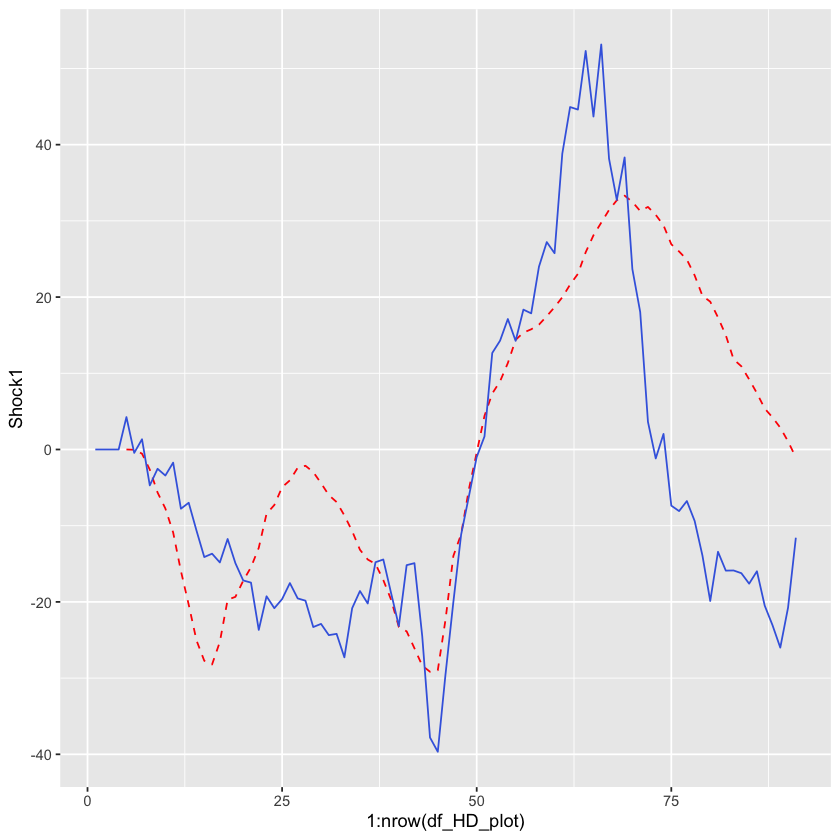

In [38]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(1,5,9,13)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



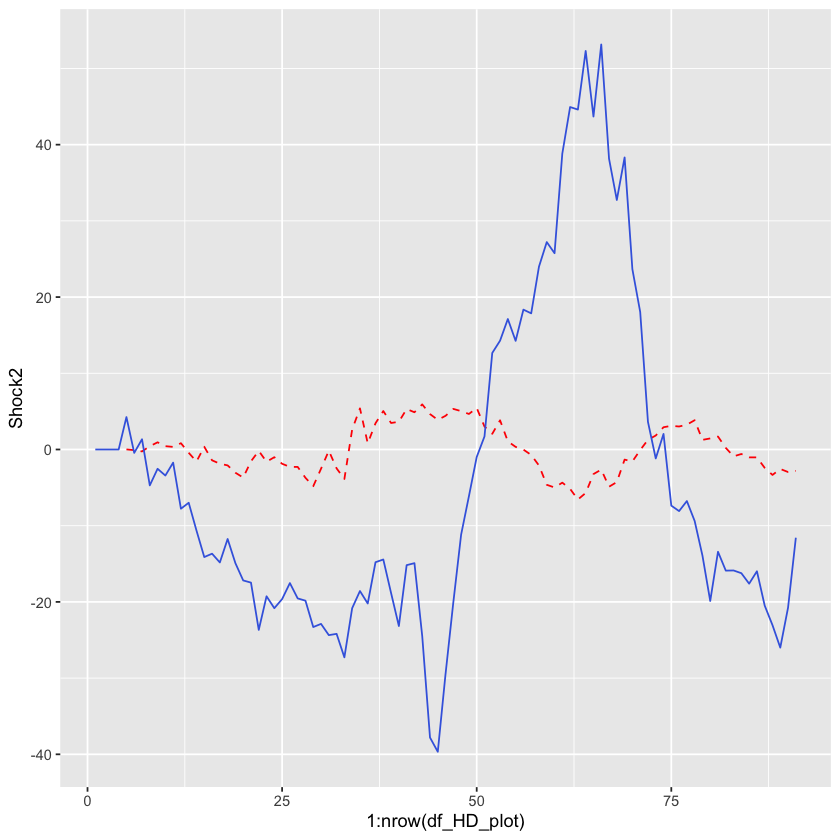

In [39]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(2,6,10,14)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



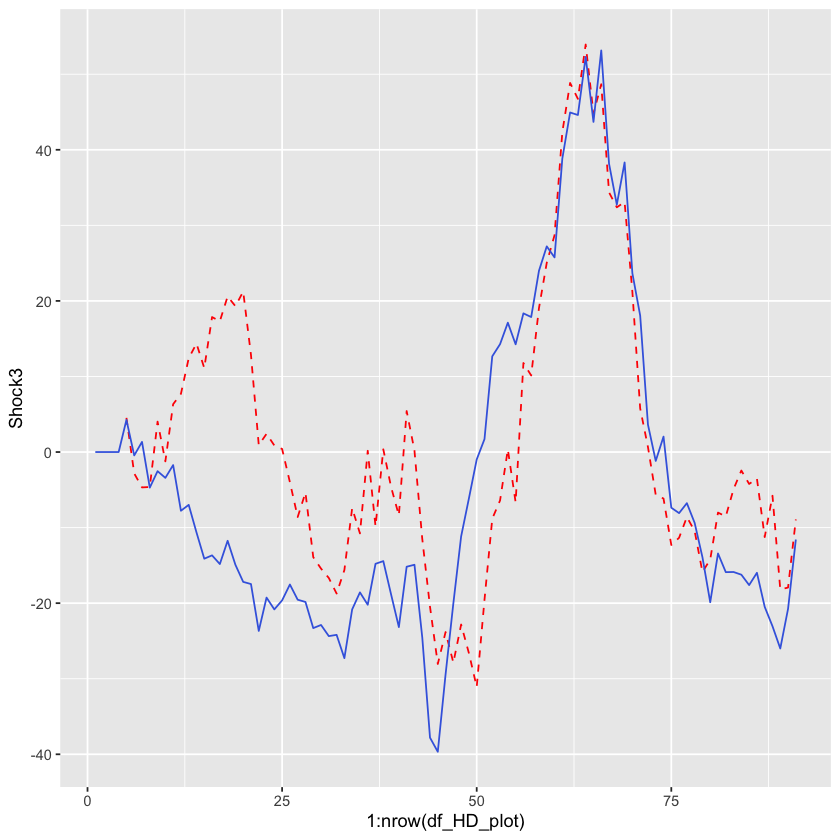

In [40]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(3,7,11,15)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



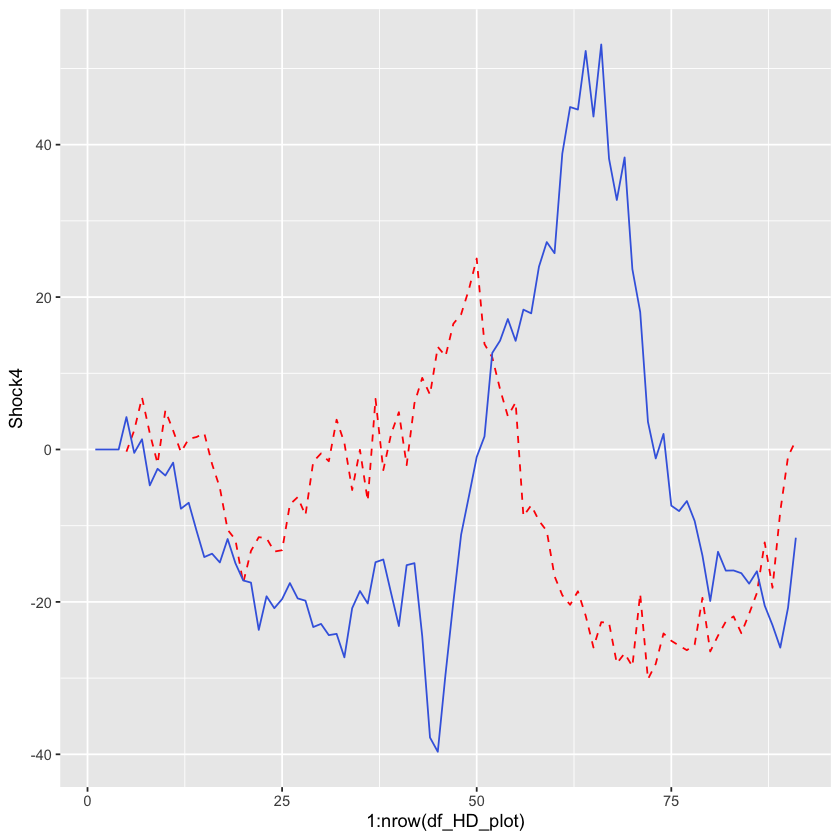

In [41]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,4],
                        (SVAR_AB_HistDecomp[,c(4,8,12,16)])[,4])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [42]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1998
for(q in 1:91){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [43]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,4],
                   SVAR_AB_HistDecomp[,13],
                   SVAR_AB_HistDecomp[,14],
                   SVAR_AB_HistDecomp[,15],
                   SVAR_AB_HistDecomp[,16])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hs", "hd", "sp")
#df_HD

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



In [44]:
df_HD

Time,Year,Season,BaseLine,mp,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998Q1,1998,1,0.0000000,NA,NA,NA,NA
1998Q2,1998,2,0.0000000,NA,NA,NA,NA
1998Q3,1998,3,0.0000000,NA,NA,NA,NA
1998Q4,1998,4,0.0000000,NA,NA,NA,NA
1999Q1,1999,1,4.2532194,0.0007024105,0.01176442,4.5265155,-0.2857630
1999Q2,1999,2,-0.4463924,-0.0354402154,-0.08689497,-2.8312825,2.5072252
1999Q3,1999,3,1.3431530,-0.5457764691,-0.25392916,-4.6808667,6.8237254
1999Q4,1999,4,-4.7126802,-2.6414596977,0.42394656,-4.6251316,2.1299646
2000Q1,2000,1,-2.5332177,-5.6480429351,0.94227878,4.0250932,-1.8525467


In [45]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

In [46]:
HD_seq1

mp,hs,hd,sp
<dbl>,<dbl>,<dbl>,<dbl>
64.26819,-4.002967,54.15813,4.443061


In [47]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)

In [48]:
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)

New names:
* NA -> ...1



In [49]:
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Speculation Shock")

In [50]:
HD.table

樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),64.26819,-4.002967,54.15813,4.443061
房價持平期(1991Q1-2002Q4),183.37369,3.232378,-126.47715,-1.095606
房價上升期(2003Q1-2020Q3),54.51414,-4.970739,59.69733,4.443061


In [51]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c"))

In [52]:
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:33:10 2021
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Supply Shock & Housing Demand Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & 64.27 & -4.00 & 54.16 & 4.44 \\ 
  房價持平期(1991Q1-2002Q4) & 183.37 & 3.23 & -126.48 & -1.10 \\ 
  房價上升期(2003Q1-2020Q3) & 54.51 & -4.97 & 59.70 & 4.44 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [53]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/SVAR_v4i6-net_in_TPE_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [54]:
xlab <- lubridate::yq(df_HD$Time)

In [55]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [56]:
# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [57]:
# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [58]:
# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

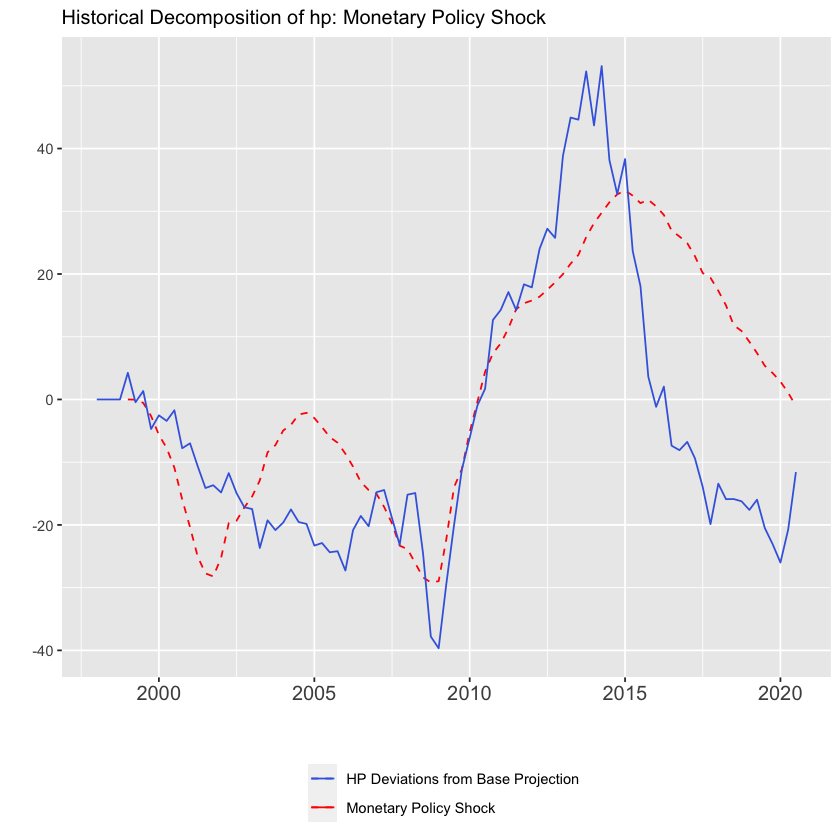

In [59]:
figure_HD.1

In [60]:
# save shock 1
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/SVAR_v4i6-net_in_TPE_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")